<h2>Setup of Utility functions</h2>

define a functions below.

- decided when plotting graph of line styles.
- function of graph arrange.
- function of bode line diagrams.

In [1]:
import matplotlib.pyplot as plt

In [2]:
def linestyle_generator():
    linestyles = ['-', '--', '-.', ':']
    line_ID = 0
    while True:
        yield linestyles[line_ID]
        line_ID = (line_ID + 1) % len(linestyles)


In [3]:
def plot_set(fig_ax: plt.Axes, *args: list) -> None:
    fig_ax.set_xlabel(args[0])
    fig_ax.set_ylabel(args[1])
    fig_ax.grid(ls=':')

    if len(args) == 3:
        fig_ax.legend(loc=args[2])


In [4]:
def bodeplot_set(fig_ax: plt.Axes, *args: list) -> None:
    # Setting of y axis labels and Gain linear diagrams.
    fig_ax[0].grid(which='both', ls=':')
    fig_ax[0].set_ylabel('Gain [dB]')

    # Setting of x, y Axis labels and phase diagrams.
    fig_ax[1].grid(which='both', ls=':')
    fig_ax[1].set_xlabel('Frequency [Hz]')
    fig_ax[1].set_ylabel('Phase [deg]')

    # show legend.
    if len(args) > 0:
        fig_ax[1].legend(loc=args[0])

    if len(args) > 1:
        fig_ax[0].legend(loc=args[1])


<h2>First-Order Lag System</h2>

Examples is transfer function of a car system.

```math
P(s) = \frac{K}{1 + T_s}  
```
$K = 1 / \mu$  
$T = M / \mu$

The lag system is expressted system that transfer function of amplifier circuit.  
```K``` is Gain and ```T``` is time constant in the lag system.  

This in important the parameter ```T``` is decision Speed of Response.

Cell as below, First-Order Lag system of Step Responce of ```K=0.5``` and ```T=1```.

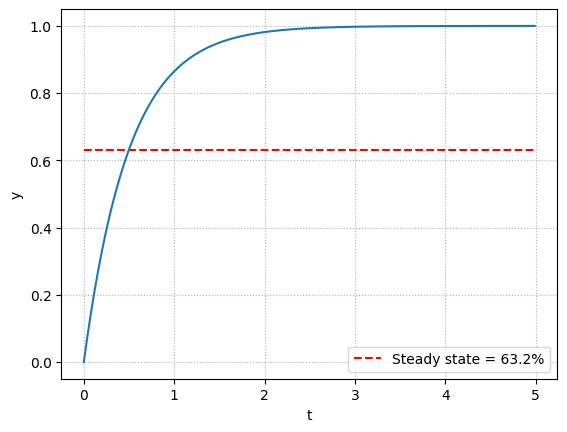

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from control.matlab import tf, step

T, K = 0.5, 1

# create a transfer function.
P = tf([0, K], [T, 1])

# input steps.
y, t = step(P, np.arange(0, 5, 0.01))
ys = y[[n for n, x in enumerate(t) if x == T]][0]

fig, ax = plt.subplots()
ax.plot(t, np.full(len(t), ys), 'r--', label=f'Steady state = {ys*100:.1f}%')
ax.plot(t, y)
ax.legend(loc='best')
plot_set(ax, 't', 'y')

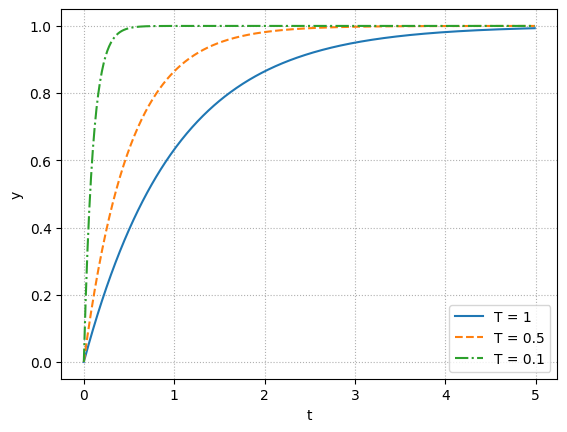

In [6]:
ls = linestyle_generator()
fig, ax = plt.subplots()

K = 1
T = [1, 0.5, 0.1]
for i in range(len(T)):
    y, t = step(tf([0, K], [T[i], 1]), np.arange(0, 5, 0.01))
    ax.plot(t, y, ls=next(ls), label=f'T = {T[i]}')

plot_set(ax, 't', 'y', 'best')

Paramete $T=-1$ then divergence.

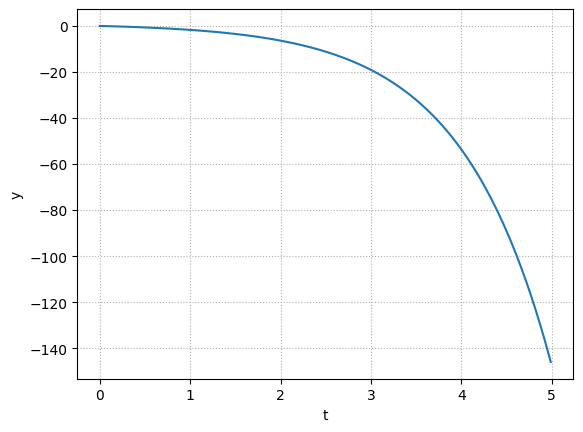

In [7]:
K = 1
T = -1

y, t = step(tf([0, K], [T, 1]), np.arange(0, 5, 0.01))

fig, ax = plt.subplots()
ax.plot(t, y)

plot_set(ax, 't', 'y')

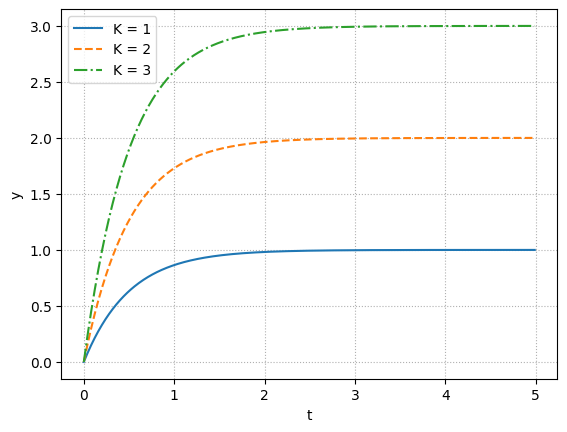

In [8]:
ls = linestyle_generator()
fig, ax = plt.subplots()

T = 0.5
K = [1, 2, 3]

for Ki in K:
    y, t = step(tf([0, Ki], [T, 1]), np.arange(0, 5, 0.01))
    ax.plot(t, y, ls=next(ls), label=f'K = {Ki}')

plot_set(ax, 't', 'y', 'upper left')

<h2>Second-Order Lag System</h2>

Examples, a transfer function of RLC circuit

```math
P(s) = \frac{1}{CL^2_s+CR_s+1} = \frac{\frac{1}{CL}}{s^2+\frac{R}{L}s+\frac{1}{CL}} \\
```
then.
```math
K=1, \omega_n=\sqrt{\frac{1}{CL}}, \varsigma=\frac{R}{2}\sqrt{\frac{C}{L}}=\frac{R}{2L\omega_n}
```
therefore.
```math
P(s) = \frac{K\omega^2_n}{s^2+2\varsigma_n s+\omega^2_n}
```
The lag system is Second-Order Lag System examples.  
Here, variable's meaning as below.

$\varsigma$ : Damping Cofficient(減衰係数)  
$\omega_n$ : Natural Angular Frequency(固有角周波数)  

Cell as below, Second-Order Lag system of Step Responce. also, parameter is ```K=1``` default numbers.

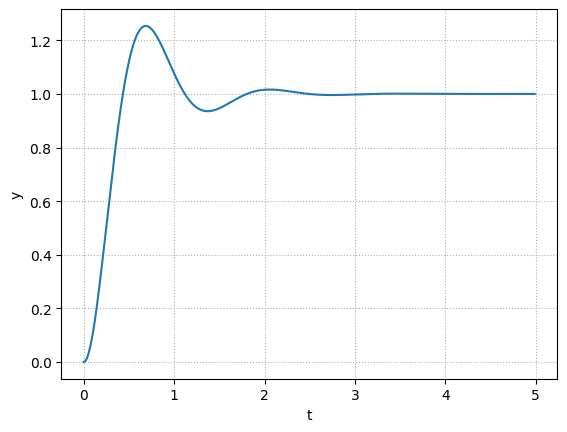

In [9]:
zeta, omega_n = 0.4, 5

P = tf([0, omega_n**2], [1, 2*zeta*omega_n, omega_n**2])
y, t = step(P, np.arange(0, 5, 0.01))

fig, ax = plt.subplots()
ax.plot(t, y)

plot_set(ax, 't', 'y')

At this time, start from the initial values ```0``` but gradually bigger but $T_p=0.685s$ approximantary $y_{max}=1.25$, after that $1$ canvergence.  
but, difference of maximum value and $y_{max}$ is 'OverShoot(最大位置行き過ぎ量)'. 

First-Order Lag System none happend overshoots, Second-Order Lag System happend. Maybe High-Order Lag System happen too.  

If, What result the system when damping cofficient $\varsigma$ set $1, 0.7, 0.4$?

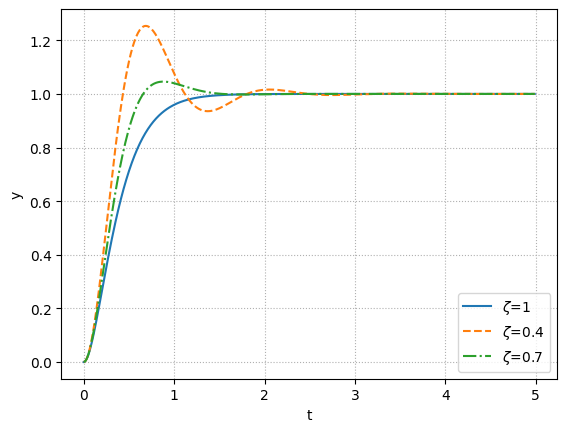

In [10]:
ls = linestyle_generator()
fig, ax = plt.subplots()

zeta = [1, 0.4, 0.7]
omega_n = 5

for zeta_i in zeta:
    P = tf([0, omega_n**2], [1, 2*omega_n*zeta_i, omega_n**2])
    y, t = step(P, np.arange(0, 5, 0.01))

    pltargs = {'ls': next(ls), 'label': f'$\\zeta$={zeta_i}'}
    ax.plot(t, y, **pltargs)

plot_set(ax, 't', 'y', 'best')

Next approch, what result the system when damping coefficient $\varsigma=0.1, 0, -0.5$ ?

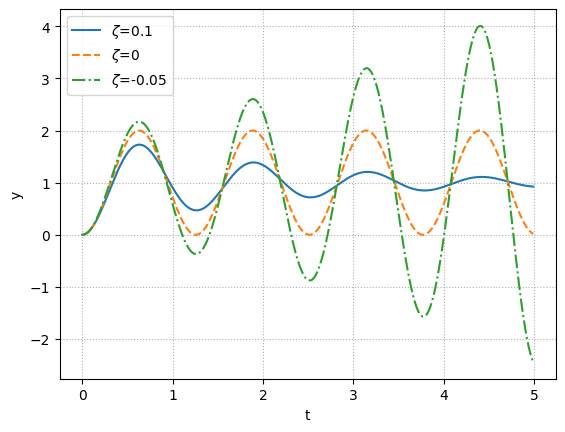

In [11]:
ls = linestyle_generator()
fig, ax = plt.subplots()

zeta = [0.1, 0, -0.05]
omega_n = 5

for zeta_i in zeta:
    P = tf([0, omega_n**2], [1, 2*omega_n*zeta_i, omega_n**2])
    y, t = step(P, np.arange(0, 5, 0.01))
    pltargs = {'ls': next(ls), 'label': f'$\\zeta$={zeta_i}'}

    ax.plot(t, y, **pltargs)

plot_set(ax, 't', 'y', 'best')

This examples is canvergence to $1$ while viveration when $\varsigma=0.1$.  
also, $\varsigma=0$ not canvergence but $\varsigma=-0.05$ gradually bigger viverate then divargence.  

examples as above, parameter $\varsigma$ is 'Attenaution Rate' (or Stability : 減衰率または安定度).  
If $\varsigma$ is Positive Number convergence a constant values and $\varsigma$ is Negative Number not convergence but divergence.  

also, paramete range $0 < \varsigma \leq 1$ when viveration and canvergence, $\varsigma \geq 1$ none viveration but canvergence.  

Next approch, change to parameter $\omega_n = 1, 5, 10$.

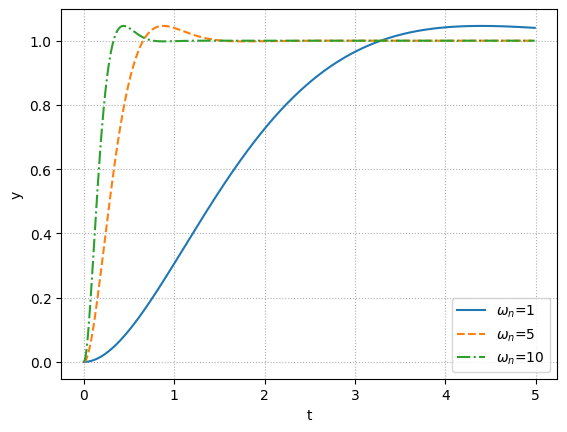

In [12]:
ls = linestyle_generator()
fig, ax = plt.subplots()

zeta = 0.7
omega_n = [1, 5, 10]

for omega_i in omega_n:
    P = tf([0, omega_i**2], [1, 2*omega_i*zeta, omega_i**2])
    y, t = step(P, np.arange(0, 5, 0.01))

    pltargs = {'ls': next(ls), 'label': f'$\\omega_n$={omega_i}'}
    ax.plot(t, y, **pltargs)

plot_set(ax, 't', 'y', 'best')

Examples as above, the parameter Natural Angular Frequency $\omega_n$ is decide of a quick response. this is resemble the parameter $T$ of First-Order lag system.